In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


c:\Users\kajou\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# 1. Load and Preprocess the Dataset
transform = transforms.Compose([
    transforms.ToTensor(),               # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,)) # Normalize the images to [-1, 1]
])

# Download and load the Fashion-MNIST training and test dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Class labels for reference
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Define the Model (Simple CNN)


100%|██████████| 26421880/26421880 [00:01<00:00, 16303840.94it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 1341005.06it/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 9781757.37it/s] 


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5149601.00it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



In [3]:

class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Input shape: [batch_size, 1, 28, 28]
        x = self.pool(torch.relu(self.conv1(x)))  # Conv layer 1 + ReLU + Pooling
        x = self.pool(torch.relu(self.conv2(x)))  # Conv layer 2 + ReLU + Pooling
        x = x.view(-1, 64 * 7 * 7)                # Flatten for FC layer
        x = torch.relu(self.fc1(x))               # Fully connected layer 1
        x = self.fc2(x)                           # Fully connected layer 2 (logits)
        return x



In [4]:

# Instantiate the model
model = FashionMNISTModel()

# 3. Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Train the Model
num_epochs = 5



In [16]:


def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")
    
    print("Finished Training")



# 5. Evaluate the Model on the Test Set
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f"Accuracy of the model on the 10,000 test images: {100 * correct / total:.2f}%")



# 6. Visualize a Few Test Images and Their Predictions
def visualize_predictions(model, test_loader, class_names):
    model.eval()
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    
    # Get predictions
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Plot the images and predicted labels
    fig = plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = fig.add_subplot(3, 3, i+1)
        ax.imshow(images[i].numpy().squeeze(), cmap='gray')
        ax.set_title(f"Pred: {class_names[predicted[i]]}\nTrue: {class_names[labels[i]]}")
        ax.axis('off')
    
    plt.show()




In [14]:
dataiter = iter(test_loader)
i = next(dataiter)

In [7]:
# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs)

Epoch [1/5], Loss: 0.1562
Epoch [2/5], Loss: 0.1349
Epoch [3/5], Loss: 0.1140
Epoch [4/5], Loss: 0.0983
Epoch [5/5], Loss: 0.0810
Finished Training


In [8]:

# Evaluate the model
evaluate_model(model, test_loader)



Accuracy of the model on the 10,000 test images: 91.20%


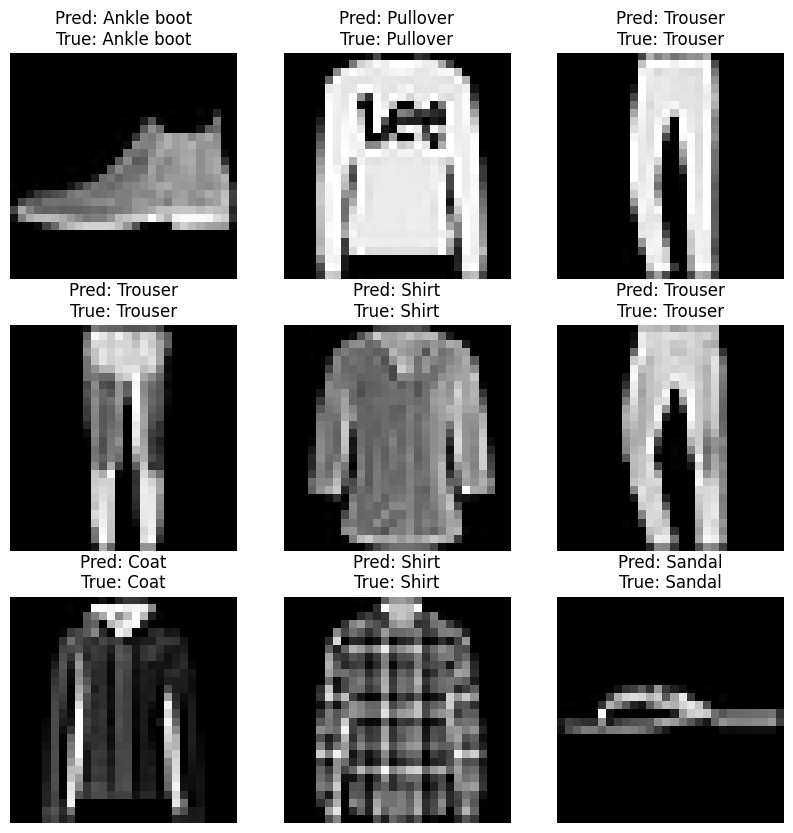

In [17]:

# Visualize some predictions
visualize_predictions(model, test_loader, class_names)

